# Bank marketing campagin predictive opening  deposit

## background

penurunan pendapatan terjadi di sebuah bank,mereka kebingungan dan ingin tahu  tindakan apa yang harus diambil.
Setelah melakukan penyelidikan, kami menemukan bahwa akar masalahnya adalah bahwa klien mereka tidak menyetor sesering sebelumnya. Mengetahui hal tersebut akhirnya pihak bank  ingin melakukan kembali campaign yang bertujuan mengajak nasabahnya yang ada agar lebih tertarik untuk berlangganan deposito. 



## Problem Statement

### Goal
- memprediksi hasil campaign
- mencari solusi untuk campaign selanjutnya melalui data  agar lebih baik lagi hasil campaign
- menghasilkan model meachine learning yang tepat untuk memprediksi

### Research question
- data pada columns apa yang menjadi factor utama yang membuat nasabah melakukan deposit ?
- bulan apa yang tepat untuk melakukan campaign ?
- apakah status pendidikan mempengaruhi nasabah akan melakukan deposit atau tidak ?
- apakah nasabah yang memiliki cicilan rumah , akan berpengaruh pada keputusannya untuk membuka deposito atau tidak ?
- apakah jenis pekerjaan mempengaruhi pelanggan yang tertarik pada deposito?


## Assumption and Data

### Assumption  : 
- melakukan EDA dan melihat insight data korelasinya dll
- melakukan modeling pada data 
- membuat meachine learningnya


### Data : 

#### Attributes: Bank client data:

- Age : Age of the lead (numeric)
- Job : type of job (Categorical)
- Marital : Marital status (Categorical)
- Education : Educational Qualification of the lead (Categorical)
- Default: Does the lead has any default(unpaid)credit (Categorical)
- Housing: Does the lead has any housing loan? (Categorical)
- loan: Does the lead has any personal loan? (Categorical)

#### Related with the last contact of the current campaign:

- Contact: Contact communication type (Categorical)
- Month: last contact month of year (Categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numeric).

#### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric)
- pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted))
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)

### Output variable (desired target):

- deposit - has the client subscribed a term deposit? (binary: 'yes','no')
  Let's check out the general overview of the dataframe



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn . preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [2]:
#create data drame to read data set
df = pd.read_csv('bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Observation
- DATA terdiri dari 17 columns dan 11.162 baris
- targetnya adalah columns deposit dimana columns tersebut menunjukan customer mana saja yang membuka deposit atau tidak.

# Data cleaning

## Mising value & duplicated data

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Observation

- Tidak ada missing value pada data ini

## Duplicated data

In [6]:
df.duplicated().sum()

0

### Observation

- Tidak ada duplicated pada data ini

# unique values

In [7]:
for column in df:
    unique = df[column].unique()
    print(f"{column} : {unique}")

age : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
balance : [2343   45 1270 ... 1594 2593 -134]
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : [1042 1467 1389 ... 1504  818 1812]
campaign : [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 

# EDA

## describe num

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Observation
- age adalah data usia client dimana data terlihat balance dan normal karena nilai min dan maxnya masuk akal
- day adalah hari terakhir client di kontak pada bulan tersebut dan terlihat datanya masuk akal
- duration adlah hitungan detik atau berapa lama client mendapatkan arahan campaign , dan nilai meannya lebih besar dari pada nilai mediannya yang mengakibatkan sebaran data tidak normal dan skew ke kanan sehingga terdapat beberapa outlier.nilai min dan maxnya  masuk akal 
- campaign adalah jumlah panggilan yang dilakukan dalam hitungan menit pada client selama kampanye dan meannya lebih besar dari pada nilai mediannya yang mengakibatkan sebaran data tidak normal dan skew ke kanan sehingga terdapat beberapa outlier.nilai min dan maxnya masuk akal
- pdays adalah hitungan berapahari client dihubungi kembali untuk melakukan campaign kembali dalam hitungan hari. nilai mean dan mediannya tidak masuk akal dan min dan max juga sama ,sehingga lebih baik di drop.
- previous jumlah contact yang dilakukan sebelum melakukan kampanye dan di lihat dari nilai mean dan median lalu min dan maxnya terdapat outlier .

In [9]:
# list of numerical variables
num = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(num))

# visualise the numerical variables
df[num].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [10]:
def get_distplot(col):
    ax = sns.distplot(df[col], bins = 6)
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR=Q3-Q1    
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    
    ax.axvline(Q1, color='red', linestyle='-', label="Q1")
    ax.axvline(Q3, color='blue', linestyle='-', label="Q3")
    ax.axvline(lower_threshold, color='yellow', linestyle='-', label="Lower threshold")
    ax.axvline(upper_threshold, color='green', linestyle='-', label="Upper threshold")
    ax.legend()

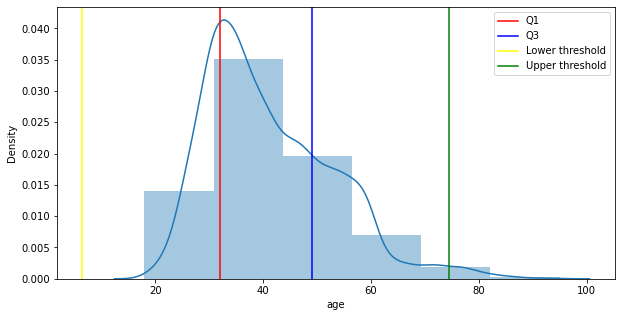

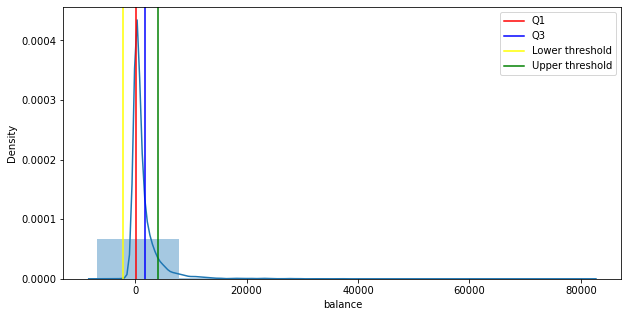

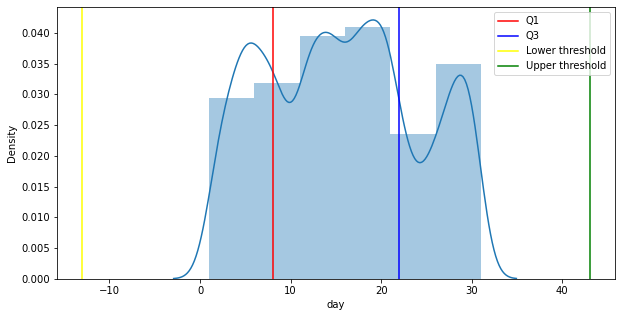

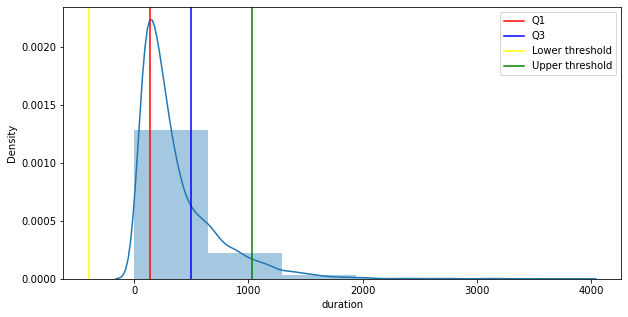

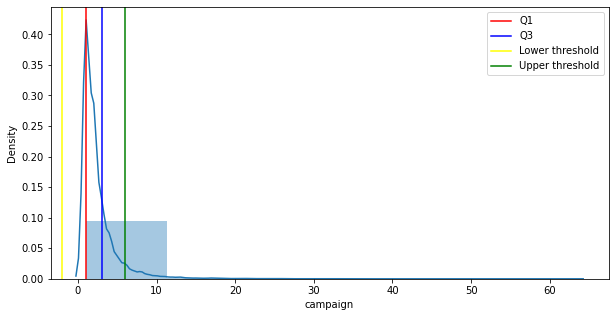

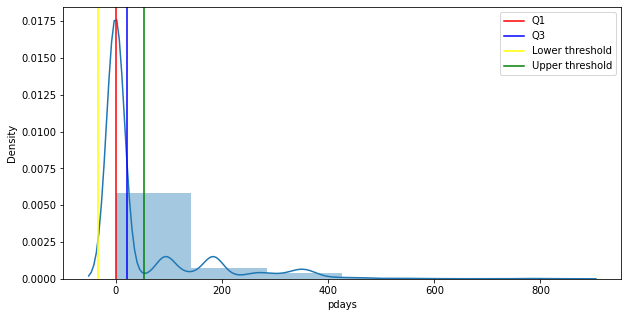

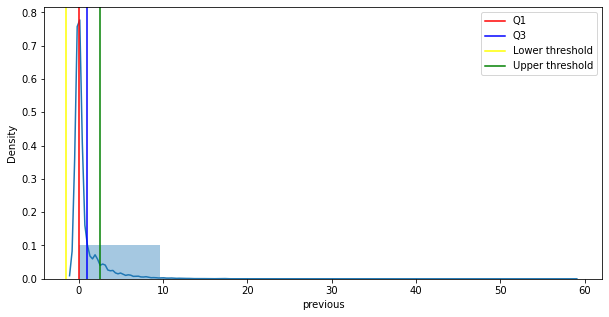

In [11]:
for i in num :
    f, (ax1) = plt.subplots(1,1,figsize=(10,5))
    ax1 = get_distplot(i)

## cek outlier

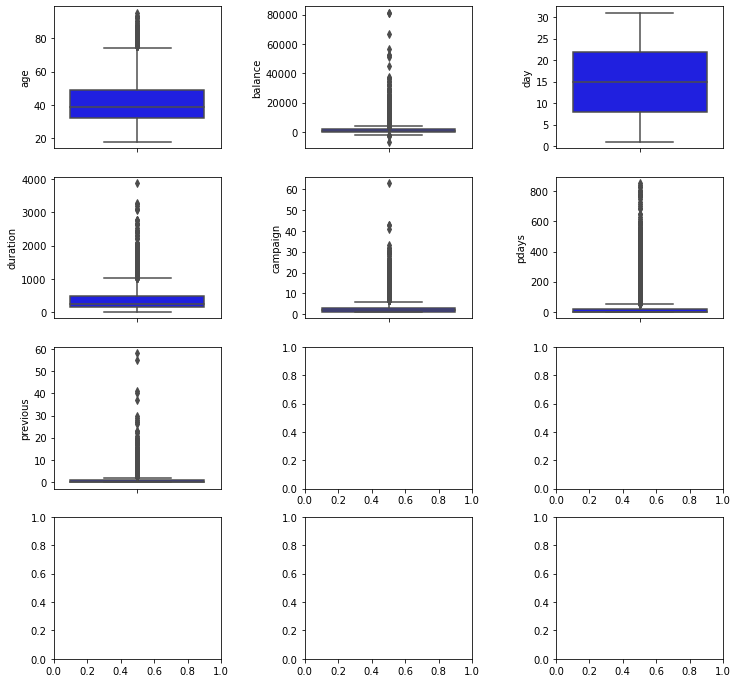

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(12,12))
index = 0
ax = ax.flatten()

for col in num:
    sns.boxplot(y=col, data=df, ax=ax[index], color='b')
    plt.subplots_adjust(wspace = .5)
    index += 1

### describe cat

In [13]:
cat=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [14]:
for feature in cat:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


In [15]:
df[cat].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,no,no,cellular,may,unknown
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326


## Observation
- dari describe pada data kateogori diatas ini dapat diketahu terdapat 11162 data pelanggan dimana mayoritas job pelanggan adalah management sebanyak 2566. mayoritas pelanggan martial statusnya married sebanyak 6351. mayoritas pelanggan educationnya secondary sebanyak 5476. mayoritas pelanggan default tidak memiliki prospect untuk melakukan creadit sebanyak 10994.  mayoritas pelanggan tidak memiliki cicilan rumah sebanyak 5881 .mayoritas pelanggan loan atau tidak memiliki cicilan di luar sebanyak 9702.mayoritas cara  mengcontact pelanggan menggunakan cellular sebanyak 8042.month adalah jumlah pelanggan yang di contact terakhir sebelum melakukan campaign yang baru , sektar 2842 pelanggan yang baru dicontact.poutcome adalah hasil kampanye sebelumnya banyak yang tidak diketahui menerima telphone sebanyak 8326.deposit adalah target pelanggan yang melakukan deposit atau tidak dan pada data ini sebanyak 32666 pelanggan tidak menerima panggilan campaign




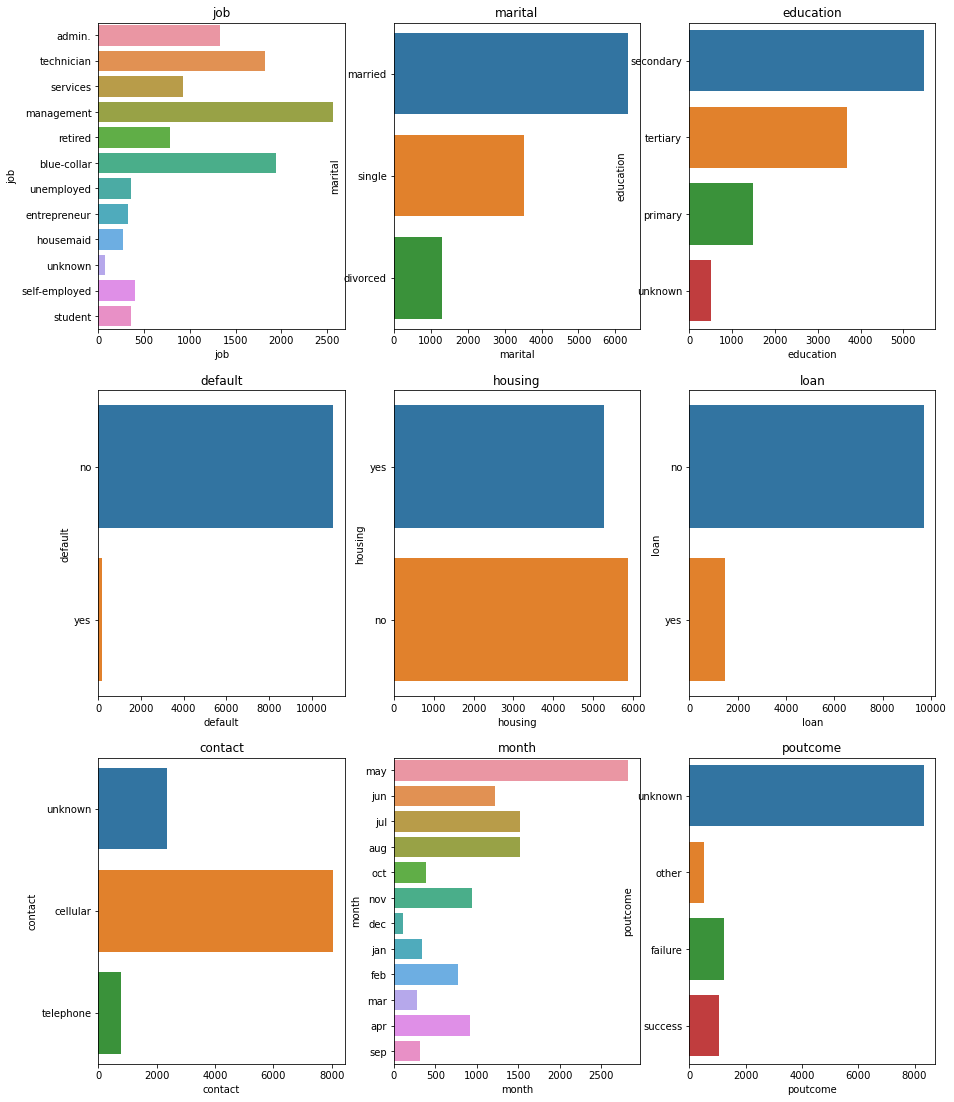

In [16]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat in cat:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat,data=df)
    plt.xlabel(cat)
    plt.title(cat)
    plotnumber+=1
plt.show()

## Observation
- client dengan jenis pekerjaan management paling banyak jumlahnya dan yang paling sedikit jumlahnya yaitu jenis pekerjaan pembantu rumah tangga
- client dengan status pernikahan jumlahnya paling banyak dan yang paling sedikit adalah client dengan status perceraian
- client dengan status pendidikan dengan jumlah terbanyak yaitu secondary atau perguruan tinggi sedangkan yang paling sedikit jumlahnya primary
- contact adalah alat campaign yang digunakan dan banyak client yang lebih memilih mengangkat telfon mereka menggunakan  cellular dan jumlah yang paling sedikitnya adalah telphone
- month adalah jumlah  client yang dapat dicontact atau dihubungi padatahun yang lalu. dan disini pada bulan may jumlah pelanggan yang bisa dihubungi lebih banyak dan bulan yang paling sulit adalah desember
- poutcome adalah hasil campaign pada tahun lalu dan terlihat banyak pelanggan yang belum terhubungi atau unknow . dan yang paling sedikit other atau belum ada kepastian jawaban dari client

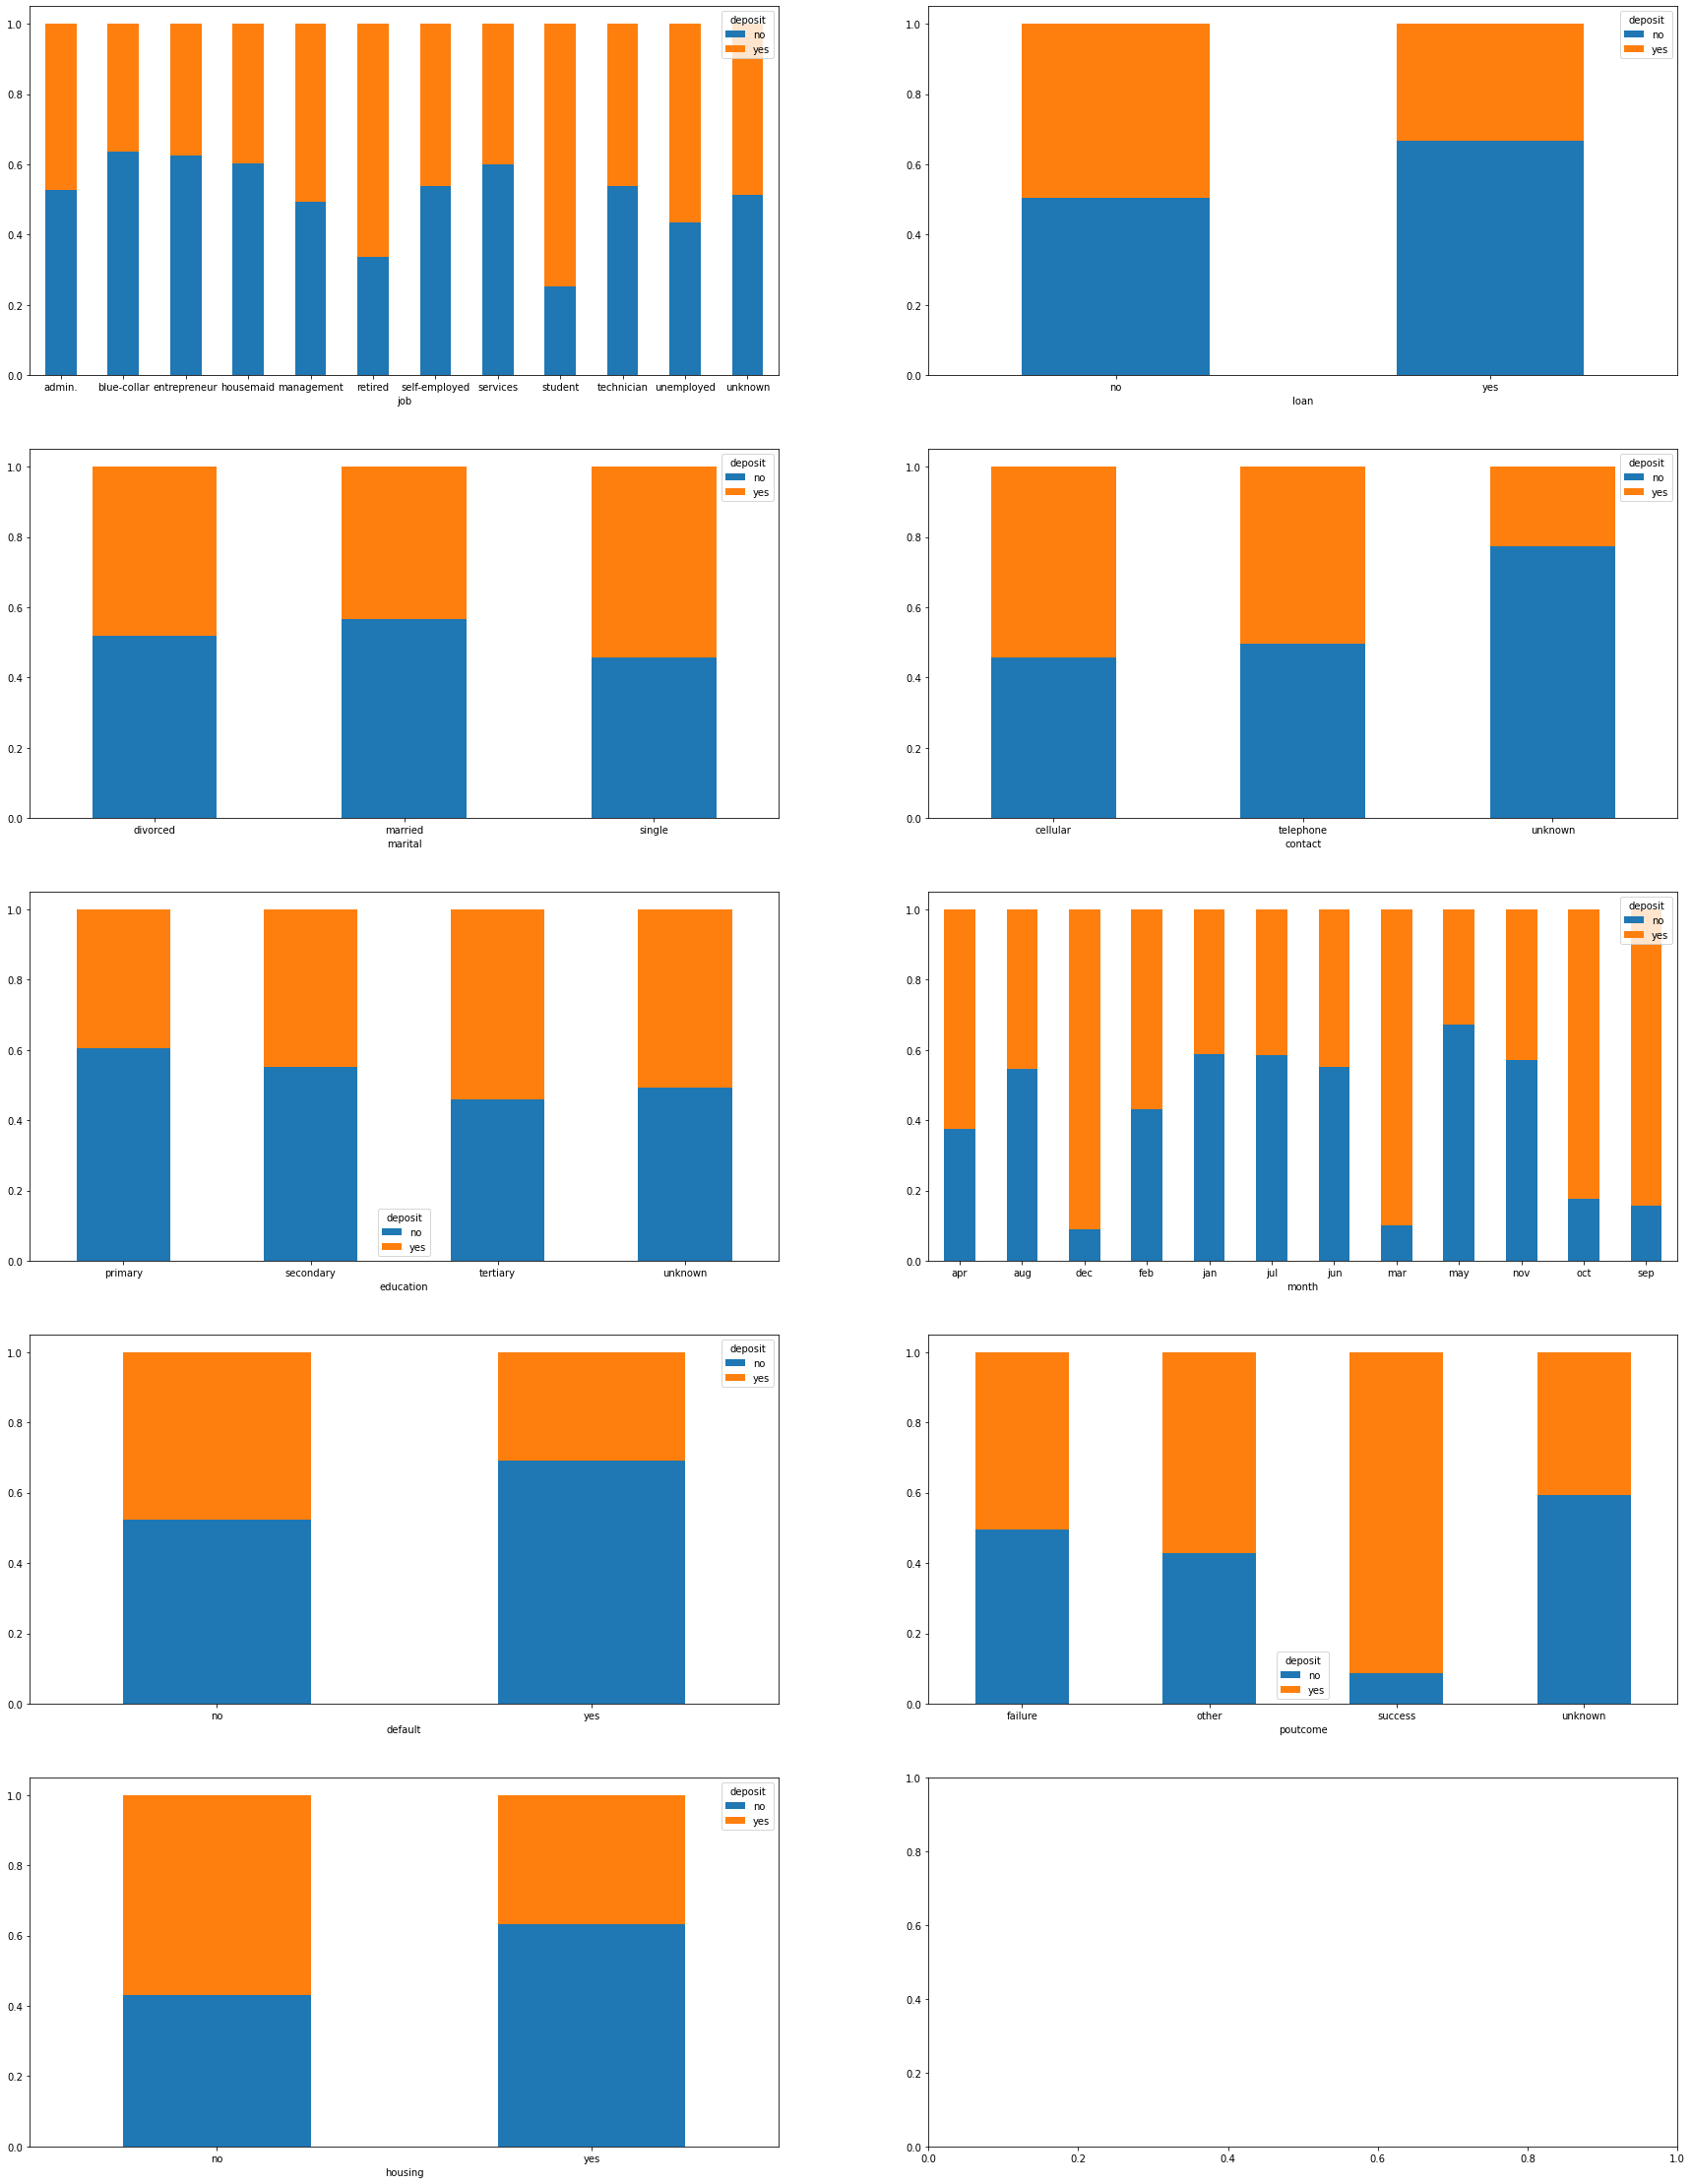

In [17]:
services =['job','marital','education','default','housing','loan','contact','month','poutcome']
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (30,40))
for i, item in enumerate(services):
    if i < 5:
        item = pd.crosstab(df[item],df['deposit'])
        item.div(item.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=axes[i,0],rot = 0)
        
        
    elif i >=5 and i < 9:
        item = pd.crosstab(df[item],df['deposit'])
        item.div(item.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=axes[i-5,1],rot = 0)
    elif i >=10 and i < 15:
        item = pd.crosstab(df[item],df['deposit'])
        item.div(item.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=axes[i-10,2],rot = 0)

## Observation
- pada columns job persentase jumlah client yang melakukan deposit  di dtemapti oleh student dengan jumlah persentase hampir 80% dan yang paling sedikit persentase client yang melakukan deposit di dtemapti oleh
- client yang memiliki cicilan rumah banyak yang tidak tertarik melakukan deposit
- marital persentase menunjukan bahwa client yang memiliki minat untuk melakukan deposit adalah client dengan status single dan yang paling sedikit adalah married
- contact persentase menunjukan bahwa client yang memiliki minat untuk melakukan deposit adalah client dengan status contact cellular 
- poutcome adalah hasil dari pra campaign dimana poutcome terlihat hasil persentase terbesarnya sukses yang berarti kemungkinan besar client menunjukan minat terhadap deposit
- pada bulan Maret, September, Oktober dan Desember, klien menunjukkan minat yang tinggi untuk deposit
- pada bulan mei sebenarnya tingkat respon client terhadap campaign cukup baik akan tetapi jumlah client yang berminat untuk melakukan deposito sedikit

### heatmap corelation

<AxesSubplot:>

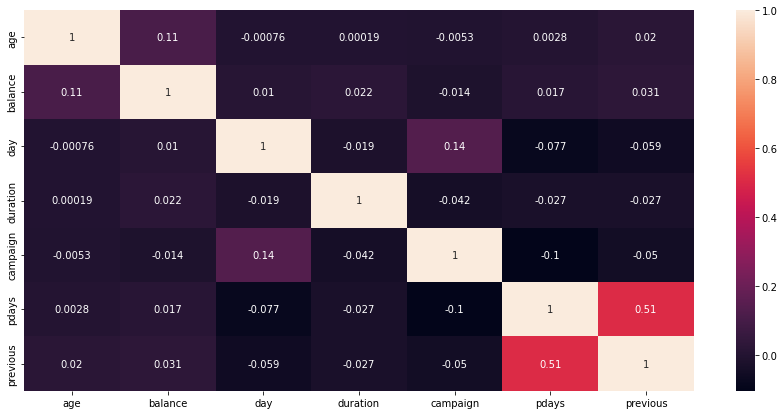

In [18]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

###  Check the Data set is balanced or not based on target values in classification

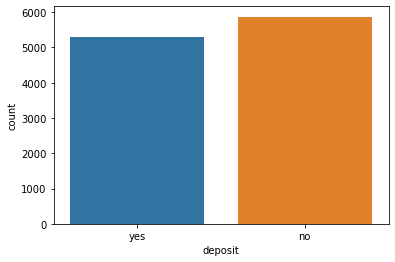

In [19]:
#total patient count based on cardio_results
sns.countplot(x='deposit',data=df)
plt.show()


In [20]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [21]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

## observation 

data cukup balance

## Data Preprocessing

In [22]:
for col_name in list(['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']):
    print('\nUnique Values Count \033[1m'+'Before Standardized \033[0m Variable',col_name)
    print(df[col_name].value_counts())
    


Unique Values Count Before Standardized  Variable job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Unique Values Count Before Standardized  Variable marital
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

Unique Values Count Before Standardized  Variable education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Unique Values Count Before Standardized  Variable default
no     10994
yes      168
Name: default, dtype: int64

Unique Values Count Before Standardized  Variable housing
no     5881
yes    5281
Name: housing, dtype: int64

Unique Values Count Before Standardized  Variable loan
no     9702
yes    1460
Name: loan, dtype: int64

Unique Values Count Before

In [23]:
df2=df.copy()

In [24]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [25]:
df2.shape

(11162, 17)

In [26]:
#defaut features does not play imp role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [27]:
df2.drop(['default'],axis=1, inplace=True)

In [28]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [29]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [30]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [31]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [32]:
# remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [33]:
# remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [34]:
df3 = df2[df2['campaign'] < 33]

In [35]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [36]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

## label encode

In [37]:
df4 = df3[df3['previous'] < 31]


In [38]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [39]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [40]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [42]:
for column in df4:
    unique = df4[column].unique()
    print(f"{column} : {unique}")

age : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
balance : [2343   45 1270 ... 1594 2593 -134]
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
duration : [1042 1467 1389 ... 1504  818 1812]
campaign : [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 18 27 30 26 23 28 31]
previous : [ 0  1  4  2  3 10  7  9  5 29  6 13 17  8 11 30 22 21 14 26 12 19 23 15
 20 27 16 28 18]
job_blue-collar : [0 1]
job_entrepreneur : [0 1]
job_housemaid : [0 1]
job_management : [0 1]
job_retired : [0 1]
job_self-employed : [0 1]
job_services : [0 1]
job_student : [0 1]
job_technician : [0 1]
job_unemployed : [0 1]
job_unknown : [0 1]
marital_married : [1 0]
marital_single : [0 1]
education_secondary : [1 0]
education_tertiary : [0 1]
educat

## Observation

- melakukan fiture enginering dengan memisahkan setiap status di columns job, marital, 'education', 'contact', 'month', 'poutcome' dan melakukan label encoding 

### heatmap corelation

<AxesSubplot:>

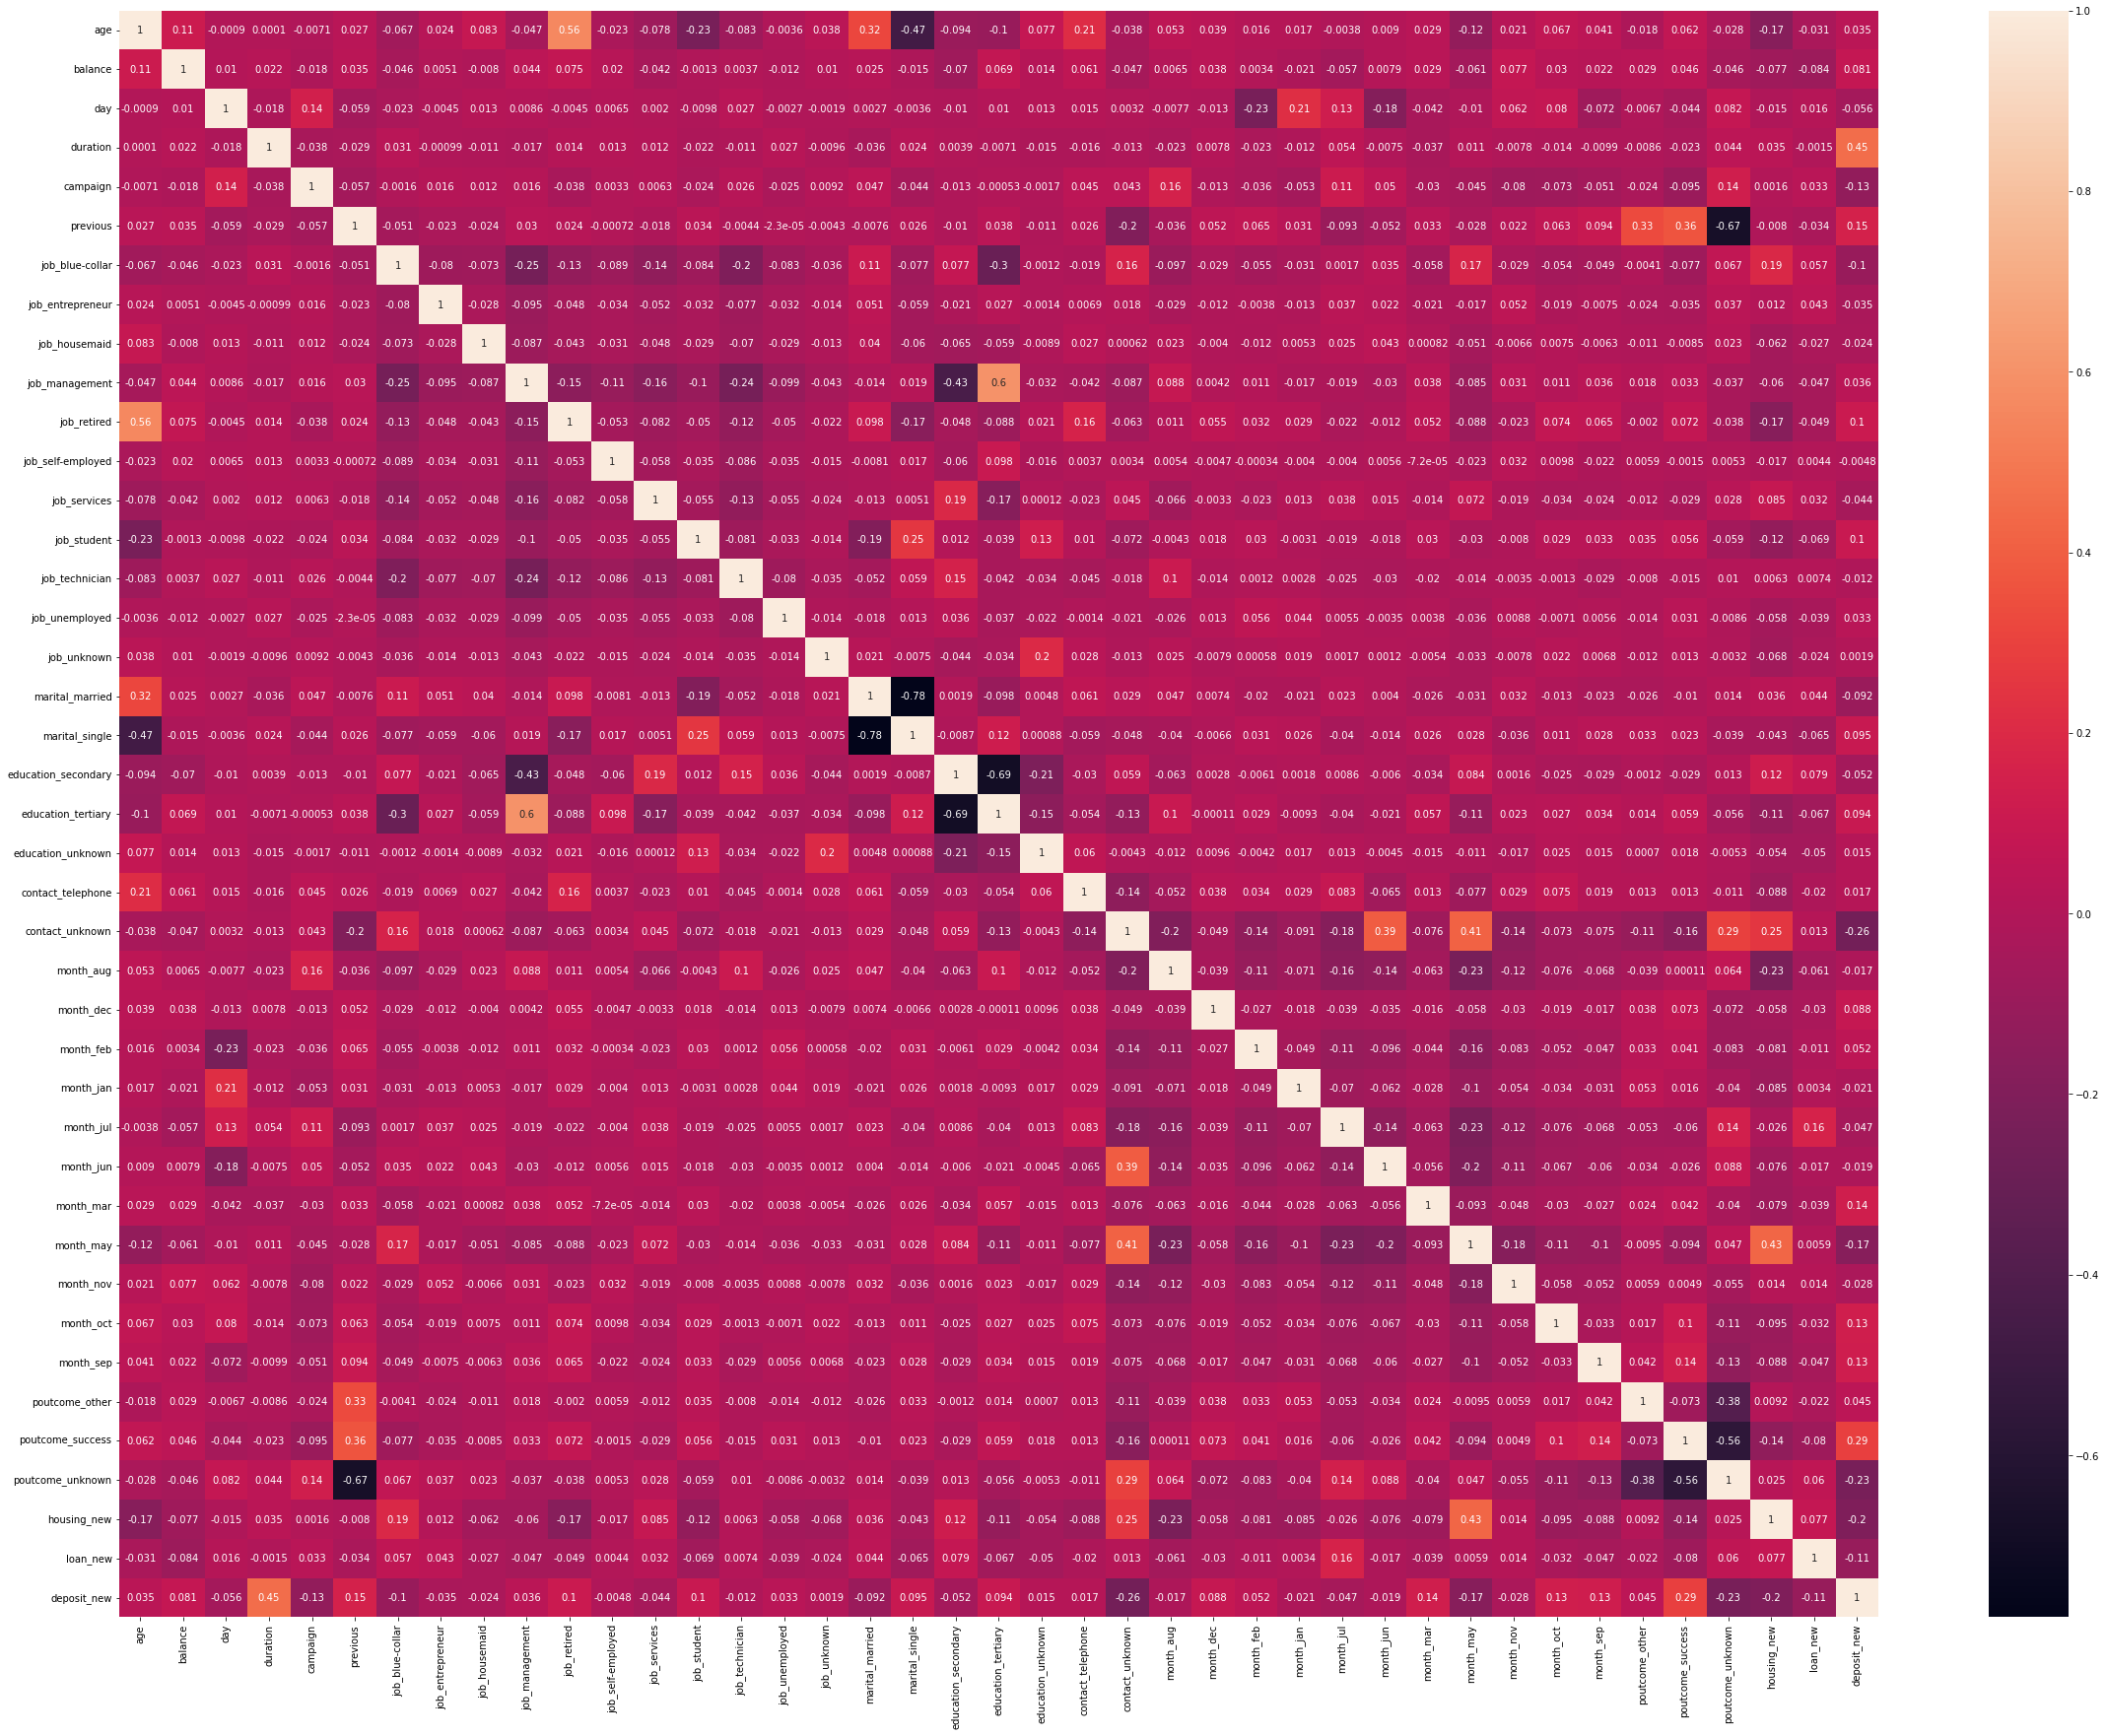

In [43]:
## Checking for correlation
cor_mat=df4.corr()
fig = plt.figure(figsize=(40,30))
sns.heatmap(cor_mat,annot=True)

## train and test split data

In [44]:
X=df4.drop(['deposit_new'],axis=1)
y=df4.deposit_new

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

# Model selection

### Random forest

In [47]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

### Metric Evaluation

In [48]:
print('f1',f1_score(y_test, preds))

f1 0.8549803209203753


### LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [50]:
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

### Metric Evaluation

In [52]:
print('f1',f1_score(y_test, y_pred_reg))

f1 0.8143176733780761


## Decission Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

### Metric Evaluation

In [55]:
print('f1',f1_score(y_test, y_pred_dt))

f1 0.775047258979206


## Observation

dari pemilihan model di atas model dengan accuracy  terbaik adalah random forest dengan f1 score 85%

## Random forest  with hyper parameter tuning

In [56]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [57]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50,60,70,80,90,100,150),
    'max_depth':(1,2,3,4,5,6,7,8,9,10,11)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: total: 2min 45s
Wall time: 2min 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
                         'n_estimators': (10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 150)},
             scoring='recall')

In [58]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
119,"{'max_depth': 11, 'n_estimators': 100}",0.864985,1
117,"{'max_depth': 11, 'n_estimators': 80}",0.862812,2
118,"{'max_depth': 11, 'n_estimators': 90}",0.862810,3
116,"{'max_depth': 11, 'n_estimators': 70}",0.862267,4
115,"{'max_depth': 11, 'n_estimators': 60}",0.861996,5
...,...,...,...
1,"{'max_depth': 1, 'n_estimators': 20}",0.404506,117
2,"{'max_depth': 1, 'n_estimators': 30}",0.403430,118
6,"{'max_depth': 1, 'n_estimators': 70}",0.387131,119
0,"{'max_depth': 1, 'n_estimators': 10}",0.380869,120


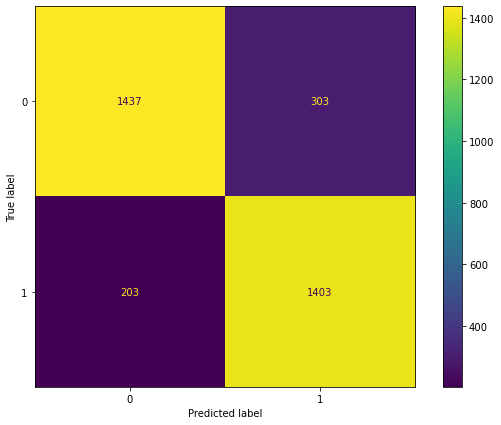

In [59]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [60]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1740
           1       0.82      0.87      0.85      1606

    accuracy                           0.85      3346
   macro avg       0.85      0.85      0.85      3346
weighted avg       0.85      0.85      0.85      3346



# conclusion

Dari bagian EDA dan pemilihan model, kami dapat dengan jelas mengidentifikasi durasi yang memegang peran  penting dalam menentukan hasil . Adalah mutlak bahwa semakin banyak  yang tertarik untuk memulai deposit itu terjadi karena  jumlah panggilan yang lebih tinggi dan durasi panggilan akan lebih tinggi dari rata-rata. Kami juga telah menemukan bahwa pekerjaan dan pendidikan juga bertindak sebagai faktor penentu penting dan mempengaruhi banyak hasil.

Berikut adalah beberapa rekomendasi bussines untuk bank yang dapat membantu meningkatkan suku bunga deposito

- Dengarkan dengan baik ketika melakukan telfon dengan nasabah gali dan ekstrak lebih banyak informasi untuk memberikan rencana deposit terbaik untuk nasabah , dari tindakan tersebut dapat meningkatkan durasi panggilan  yang dapat menarik pelanggan untuk melakukan deposit
- melakukan campaign  pada bulan mart, sept, oct, dan desember akan menjadi pilihan yang baik karena banyak yang telah menunjukkan hasil positif dari riwayat data
- Sesuaikan jadwal kampanye sesuai dengan keadaan ekonomi negara, jangan mengeluarkan biaya  kampanye saat ekonomi negara sedang tidak bagus
- focuskan campaign pada job retierd dan student banyak melakukan promosi pada mereka agar lebih banyak melakukan deposit
- pada bulan mei sebenarnya tingkat respon client terhadap campaign cukup baik akan tetapi jumlah client yang berminat untuk melakukan deposito sedikit, harus di caritahu penyebabnya di lapangan dan perbaiki tatacara campaign durasinya karna berpotensi menghasilkan deposit yang besar.
